# Iteration



In [10]:
import sys
from pathlib import Path

# Find project root by looking for _config.yml
current = Path.cwd()
for parent in [current, *current.parents]:
    if (parent / '_config.yml').exists():
        project_root = parent  # ← Add project root, not chapters
        break
else:
    # Fallback: go up 2 levels from notebook
    project_root = Path.cwd().parent.parent

# Add project root to path
sys.path.insert(0, str(project_root))

# Now import from project root
# import thinkpython  # ← Direct import, not from shared
import thinkpython, diagram, jupyturtle

The ability to repeat a block of code is one of the most powerful features in programming. We call this **iteration**. Python provides two primary loop constructs to handle this:

*   **`for` loops**: Designed for **definite iteration**. Use these when you know in advance how many times code needs to run (e.g., iterating over a list of items).
*   **`while` loops**: Designed for **indefinite iteration**. Use these when you want to repeat a task as long as a specific **condition** is true, even if you don't know exactly how many times that will be.

## `For` Loops

- The `for` loops are used when you have a block of code that you want to **repeat** a **fixed number** of times.
- We use `for` for iterating over `sequences` like `lists`, `tuples`, `strings`, and `ranges`.
- We can use a `for` loop that uses the `range` function to display a sequence of numbers.

When we need to iterate over the items in a **collection**, we typically use a for loop, which is specifically designed for this task. A `for` loop can loop through an object because the object is an **iterable**. An iterable is any Python object that can return its elements one at a time, allowing you to loop over it. Common Iterables in Python include: 

- Sequences: lists, tuples, strings, ranges
- Collections: sets, dictionaries, frozensets
- Files: file objects
- Custom objects: anything implementing the iterator protocol

### `for` Loop and Iterables

Python’s for loop works much like the **foreach** loop in other programming languages. Here’s the basic syntax:

```python
for item in iterable:
    <block>
```

In this syntax, we have:
- the `for` keyword
- the **loop variable**, item, which holds the current value in the target data collection
- the **body** of a block of code that will run one iteration as the loop pulls one item from the iterable.

Once the loop finishes iterating over the data, the execution flow jumps to the next statement after the loop.

Here are two quick examples of a for loop in Python. In the first example, we use a for loop to traverse a list of fruit names. The loop **body** contains a call to `print()`, which displays each fruit in each loop. 

#### Loop through lists

In [1]:
fruits = ['apple', 'banana', 'cherry']  ### iterable object

for fruit in fruits:
    print(fruit)

apple
banana
cherry


In [2]:
nums = [ 1, 2, 3, 4, 5 ]

for num in nums:
    print(num**2, end=" ")

1 4 9 16 25 

#### Loops through strings
Note that this is character by character.

In [4]:
for letter in 'hello, world':
    print(letter, end=' ')

h e l l o ,   w o r l d 

In [ ]:
# === EXERCISE: Basic For Loop ===
# Write a for loop that iterates through the list `prices` 
# and prints each price with a 10% tax added (price * 1.1).

prices = [10.00, 20.00, 100.00]

# TODO: Write your loop here




### your code ends here

In [34]:
prices = [10.00, 20.00, 100.00]

for price in prices:
    print(price * 1.1)

11.0
22.0
110.00000000000001


### Nested Loops

A **nested loop** is a loop inside the body of another loop. The "inner" loop finishes all of its iterations for every single iteration of the "outer" loop.

**Syntax and Structure:**

```python
for outer_item in outer_sequence:
    ### outer loop body
    for inner_item in inner_sequence:
        # inner loop body executes for each outer_item

A classic use case is generating a multiplication table. For every number `i` (rows), we iterate through numbers `j` (columns).

In [15]:
for i in range(2, 9):          # Outer loop (rows)
    for j in range(2, 9):      # Inner loop (columns)
        print(f"{i*j}", end="\t")
    print()                    # Newline after each row

4	6	8	10	12	14	16	
6	9	12	15	18	21	24	
8	12	16	20	24	28	32	
10	15	20	25	30	35	40	
12	18	24	30	36	42	48	
14	21	28	35	42	49	56	
16	24	32	40	48	56	64	


Nested loops are essential for working with multi-dimensional data, like matrices (lists of lists).

In [16]:
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

for row in matrix:
    for item in row:
        print(item, end=" ")
    print()  # Newline after printing a full row

1 2 3 
4 5 6 
7 8 9 


In [ ]:
# === EXERCISE: Star Pattern ===
# Use a nested loop to print the following pattern of stars:
# *
# * *
# * * *
# * * * *
# * * * * *

# Hint: The outer loop controls the rows (range 1 to 6).
# The inner loop controls how many stars print on that row.
for row in range(1, 6):
    # TODO: write the inner loop
    
    print() # Newline after each row

In [ ]:
for row in range(1, 6):
    for star in range(row):
        print("*", end=" ")
    print()

### Advanced for Loop

Python provides several advanced techniques that make your code more elegant and readable: 

- enumerate() - getting index and value
- zip() - parallel iteration
- Unpacking in loops

In [5]:
### enumerate example
fruits = ['apple', 'banana', 'cherry', 'date']

for index, fruit in enumerate(fruits):
    print(f"{index}: {fruit}")

0: apple
1: banana
2: cherry
3: date


In [21]:
### zip example
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30, 35]
cities = ['New York', 'London', 'Tokyo']

for name, age, city in zip(names, ages, cities):
    print(f"{name} is {age} years old and lives in {city}")

Alice is 25 years old and lives in New York
Bob is 30 years old and lives in London
Charlie is 35 years old and lives in Tokyo


In [27]:
person = {
    'name': 'Alice',
    'age': 25,
    'city': 'New York',
    'job': 'Engineer'
}

# Unpacking key-value pairs
for key, value in person.items():
    print(f"{key}: {value}")
print()
# Unpacking keys only
for key in person.keys():
    print(f"Key: {key}")
print()
# Unpacking values only
for value in person.values():
    print(f"Value: {value}")

name: Alice
age: 25
city: New York
job: Engineer

Key: name
Key: age
Key: city
Key: job

Value: Alice
Value: 25
Value: New York
Value: Engineer


In [33]:
# === EXERCISE: Zip Iteration ===
# Use zip() to iterate through these two lists simultaneously.
# Print the sentence: "[Product] costs $[Price]" for each item.
# to align the prices, use \t

products = ["Book", "Laptop", "Mouse"]
costs = [15, 900, 25]

# TODO: Your code starts here




### your code stops here.

In [31]:
products = ["Book", "Laptop", "Mouse"]
costs = [15, 900, 25]

for item, price in zip(products, costs):
    print(f"{item} costs:\t ${price}")

Book costs:	 $15
Laptop costs:	 $900
Mouse costs:	 $25


### Updating variables

As you may have discovered, it is legal to make more than one assignment
to the same variable.
A new assignment makes an existing variable refer to a new value (and stop referring to the old value).

For example, here is an initial assignment that creates a variable.

In [19]:
x = 5
x

5

And here is an assignment that changes the value of a variable.

In [20]:
x = 7
x

7

The following figure shows what these assignments looks like in a state diagram.

In [21]:
from diagram import make_rebind, draw_bindings

bindings = make_rebind('x', [5, 7])

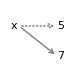

In [22]:
from diagram import diagram, adjust

width, height, x, y = [0.54, 0.61, 0.07, 0.45]
ax = diagram(width, height)
bbox = draw_bindings(bindings, ax, x, y)
# adjust(x, y, bbox)

The dotted arrow indicates that `x` no longer refers to `5`.
The solid arrow indicates that it now refers to `7`.

A common kind of assignment is an **update**, where the new value of
the variable depends on the old.

In [23]:
x = 7

In [24]:
x = x + 1
x

8

This statement means "get the current value of `x`, add one, and assign the result back to `x`."

If you try to update a variable that doesn't exist, you get an error, because Python evaluates the expression on the right before it assigns a value to the variable on the left.

In [25]:
%%expect NameError

z = z + 1

Before you can update a variable, you have to **initialize** it, usually
with a simple assignment:

In [26]:
z = 0
z = z + 1
z

1

Increasing the value of a variable is called an **increment**; decreasing the value is called a **decrement**.
Because these operations are so common, Python provides **augmented assignment operators** that update a variable more concisely.
For example, the `+=` operator increments a variable by the given amount.

In [27]:
z += 2
z

3

There are augmented assignment operators for the other arithmetic operators, including `-=` and `*=`.

In [36]:
# === EXERCISE: Accumulator ===
# Initialize a variable `total_rainfall` to 0.
# Iterate through the list `weekly_rain`.
# Add each value to `total_rainfall` using the += operator.
# Print the total at the end.

weekly_rain = [1.2, 0.5, 2.3, 0.0, 1.1]
total_rainfall = 0

### TODO: your code starts here





print(f"Total rainfall: {total_rainfall}")

### TODO: your code stops here

Total rainfall: 0


In [37]:
weekly_rain = [1.2, 0.5, 2.3, 0.0, 1.1]
total_rainfall = 0

for rain in weekly_rain:
    total_rainfall += rain

print(f"Total rainfall: {total_rainfall}")

Total rainfall: 5.1


## `while` Loops

A Python `while` loop repeatedly executes a block of code as long as a specified **condition** remains `True`. Once the condition evaluates to `False`, the program continues with the statement immediately following the loop.

Common patterns for using `while` loops include:
| Type                    | Controlled By    | Ends When               | Best For |
| ----------------------- | ---------------- | ----------------------- |--|
| Counting while | **Number condition** | Condition becomes False | Repetition with counters |
| Sentinel while     | Special **value**    | Sentinel entered        | User input loops|
| `while True`      | **`break`** | Break executes          | Menus, games, event loops |


The syntax of the while loop is:
```python
while [condition]:
    [statement(s)]     ### body; runs repeatedly when condition is True
```

The execution process of a `while` loop follows a specific cycle:

1. Evaluate: Python checks if the condition is True.
2. Execute: If True, the indented body runs.
3. Repeat: After the body finishes, execution jumps back to step 1.
4. Exit: If the condition evaluates to False, the loop stops, and the program proceeds to the code below it.

### Counting `while` (Condition-Controlled)

In a **counting** `while` loop:
- Loop repeats while a numeric condition remains true.
- A `while` loop requires a **counter** as a variable to **increment/decrement** to be ready. In this example, we need to define an indexing variable, **count**.
- "Off-by-one errors": Python indexing is 0-based, so use `<` instead of `<=` for aligned boundary. 

In [10]:
count = 0                        ### initialization of the variable
while count < 10:                ### condition to check
    print(count, end = " ") 
    count = count+1              ### update counter

0 1 2 3 4 5 6 7 8 9 

### Sentinel `while` Loop (Data-Controlled)

In a sentinel `while` loop, the loop continues until a special value (sentinel) is entered.

In [12]:
### PRACTICE:

user_input = ""

while user_input != "q":
    user_input = input("Enter q to quit: ")


Enter q to quit:  q


### `while True` loop (Infinite Loop with break)

- An infinite while loop does not break:
- A `while True` loop is an infinite loop, and we create a condition to exit manually.

```python
while True:
    print("This runs forever")
```

In [19]:
while True:
    user_input = input("Enter q to quit: ")

    if user_input == "q":        ### when condition met
        break                    ### break!!

Enter q to quit:  q


A `while True` loop in Python emulates the `do while` loop in languages like C, Java, or JavaScript, where the code block is run **at least once** before the condition is checked to decide whether to terminate. The syntax of the `do while` loop is:


```C
do:
    run code
while condition is true
```


In Java:
```java
do {
    System.out.println("Hello");
} while (x < 5);
```

## Loop Control Statements

You can control the execution of a `for` or `while` loop using the following statements:

- **`break`** – Immediately exits the loop, even if the loop condition is still `True`.  
- **`continue`** – Skips the remainder of the current iteration and returns to the top of the loop to recheck the condition.  
- **`pass`** - Used as a **placeholder** to write empty loops (also used for empty control statements, functions, and classes).
- **`else` clause** – Executes only if the loop finishes normally (when the condition becomes `False`), and does **not** run if the loop is terminated by a `break` statement.


In [20]:
### 1/4. break statement for
for i in range(10):
    if i == 5:
        break
    print(i, end = " ")       ### output: 0 1 2 3 4

0 1 2 3 4 

In [22]:
### 1/4. break statement while
i = 0
while i < 10:
    print(i, end = " ")
    if i == 5:
        break
    i += 1

0 1 2 3 4 5 

In [27]:
### 2/4. continue statement for 
for i in range(10):
    if i == 5:
        continue
    print(i, end = " ")

0 1 2 3 4 6 7 8 9 

In [23]:
### 2/4. continue statement while 
i = 0
while i < 10:
  i += 1
  if i == 5:
    continue
  print(i, end = " ")

1 2 3 4 6 7 8 9 10 

In [24]:
### 3/4. pass statement for
for i in range(10):
    pass  # TODO: implement later
print(i)

9


In [32]:
### 3/4. pass statement for
i = 0
while i < 10:
    i += 1
    pass         ### TODO: do something later
    # print("after pass")     ### this will run, after pass!!!
  
print('Value of i :', i)

Value of i : 10


In [27]:
### 4/4. else statement with loops
for i in range(10):
    print(i, end=' ')
else:
    print("Loop is over") 

0 1 2 3 4 5 6 7 8 9 Loop is over


In [30]:
### 4/4. else statement with loops
i = 0
while i < 10:
    print(i, end=' ')
    i += 1
else:
    print("Loop is over")

0 1 2 3 4 5 6 7 8 9 Loop is over


`pass` works similarly to `continue` in a `while` loop, with distinctions:
| Feature | `pass` | `continue` |
| :--- | :--- | :--- |
| **Definition** | A null operation; it literally does nothing. | Skips the remainder of the current loop iteration. |
| **Context** | Can be used anywhere (**loops**, **functions**, **classes**, `if` statements). | Only allowed inside **loops** (`for` or `while`). |
| **Impact on Flow** | Execution continues to the next statement in the block. | Execution jumps back to the start of the loop for the next cycle. |
| **Primary Use** | Syntactic placeholder (prevents "empty block" errors). | Logic control (skips specific items based on a condition). |
| **Example Scenario** | Creating an empty function for future implementation. | Printing only odd numbers by skipping even ones. |\

In [38]:
# === EXERCISE: Break and Continue ===
# Loop through numbers from 1 to 20.
# 1. If the number is divisible by 4, skip it (use continue).
# 2. If the number is 18, stop the loop entirely (use break).
# 3. Otherwise, print the number.

for i in range(1, 21):
    # TODO: check for 18 first (break)
    
    # TODO: check for divisible by 4 (continue)
    
    print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [18]:
for i in range(1, 21):
    if i == 18:
        break
    
    if i % 4 == 0:
        continue
    
    print(i, end=" ")

1 2 3 5 6 7 9 10 11 13 14 15 17 